# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
link = "https://api.openweathermap.org/data/2.5/weather?"
link = f"{link}appid={api_key}&units=imperial&q="

#set up lists hold data

location = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind = []

#set orgainizational variables
count = 0
current_set = 1

#collect data and store in lists
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
   try:
       data = requests.get(link+city).json()
       location.append(data["name"])
       clouds.append(data["clouds"]["all"])
       country.append(data["sys"]["country"])
       date.append(datetime.date.fromtimestamp(data["dt"]))
       humidity.append(data["main"]["humidity"])
       lats.append(data["coord"]["lat"])
       lngs.append(data["coord"]["lon"])
       max_temp.append(data["main"]["temp_max"])
       wind.append(data["wind"]["speed"])
       if count > 49:
           count = 1
           current_set += 1
       else:
           count += 1
       print(f"Processing record {count} of set {current_set} | {city}")
   except Exception:
       print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
                                                                          

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | sitka
City not found. Skipping...
Processing record 2 of set 1 | mandurah
Processing record 3 of set 1 | mogadishu
Processing record 4 of set 1 | sechura
Processing record 5 of set 1 | khash
City not found. Skipping...
Processing record 6 of set 1 | hobart
Processing record 7 of set 1 | haines junction
Processing record 8 of set 1 | nikolskoye
Processing record 9 of set 1 | college
City not found. Skipping...
City not found. Skipping...
Processing record 10 of set 1 | laguna
Processing record 11 of set 1 | busselton
Processing record 12 of set 1 | bytow
Processing record 13 of set 1 | isangel
Processing record 14 of set 1 | kapaa
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing record 15 of set 1 | boguchany
Processing record 16 of set 1 | rikitea
Processing record 17 of set 1 | tazovskiy
Processing record 18 of set 1 | noumea
Processing record 19 of set 1

Processing record 37 of set 4 | colac
Processing record 38 of set 4 | laredo
Processing record 39 of set 4 | husavik
Processing record 40 of set 4 | flinders
City not found. Skipping...
Processing record 41 of set 4 | lasa
Processing record 42 of set 4 | aykhal
Processing record 43 of set 4 | dennis
Processing record 44 of set 4 | spencer
Processing record 45 of set 4 | nouadhibou
Processing record 46 of set 4 | bambous virieux
Processing record 47 of set 4 | hervey bay
City not found. Skipping...
Processing record 48 of set 4 | jamestown
Processing record 49 of set 4 | tual
Processing record 50 of set 4 | talara
Processing record 1 of set 5 | ingham
Processing record 2 of set 5 | pimentel
Processing record 3 of set 5 | pilar
Processing record 4 of set 5 | salaverry
Processing record 5 of set 5 | amarante
Processing record 6 of set 5 | cardston
Processing record 7 of set 5 | correntina
Processing record 8 of set 5 | puerto escondido
Processing record 9 of set 5 | souillac
Processing re

Processing record 22 of set 8 | juybar
Processing record 23 of set 8 | eureka
Processing record 24 of set 8 | samarinda
Processing record 25 of set 8 | havelock
City not found. Skipping...
Processing record 26 of set 8 | ahuimanu
Processing record 27 of set 8 | xinqing
Processing record 28 of set 8 | swellendam
Processing record 29 of set 8 | evensk
Processing record 30 of set 8 | nioro
Processing record 31 of set 8 | borba
Processing record 32 of set 8 | mundo nuevo
Processing record 33 of set 8 | campbell river
Processing record 34 of set 8 | chino valley
Processing record 35 of set 8 | zagan
Processing record 36 of set 8 | kaniama
Processing record 37 of set 8 | aranos
Processing record 38 of set 8 | muisne
Processing record 39 of set 8 | klaksvik
Processing record 40 of set 8 | stutterheim
Processing record 41 of set 8 | dakar
Processing record 42 of set 8 | catalao
Processing record 43 of set 8 | oistins
Processing record 44 of set 8 | bandarbeyla
City not found. Skipping...
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
df = {"City": location,
     "Cloudiness": clouds,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Latitude": lats,
     "Longitude": lngs,
     "Max Temperature": max_temp,
     "Wind Speed": wind
}

#convert to dataframe
df = pd.DataFrame(df)
df.count()

City               549
Cloudiness         549
Country            549
Date               549
Humidity           549
Latitude           549
Longitude          549
Max Temperature    549
Wind Speed         549
dtype: int64

In [13]:
df.to_csv("../output_data/weather_data.csv")
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Sitka,42,US,2019-09-28,79,37.17,-99.65,70.00,13.00
1,Mandurah,0,AU,2019-09-28,53,-32.55,115.70,75.99,8.05
2,Mogadishu,82,SO,2019-09-28,88,2.04,45.34,75.68,10.65
3,Sechura,6,PE,2019-09-28,89,-5.56,-80.82,62.83,12.44
4,Khash,0,IR,2019-09-28,23,28.22,61.21,71.14,1.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

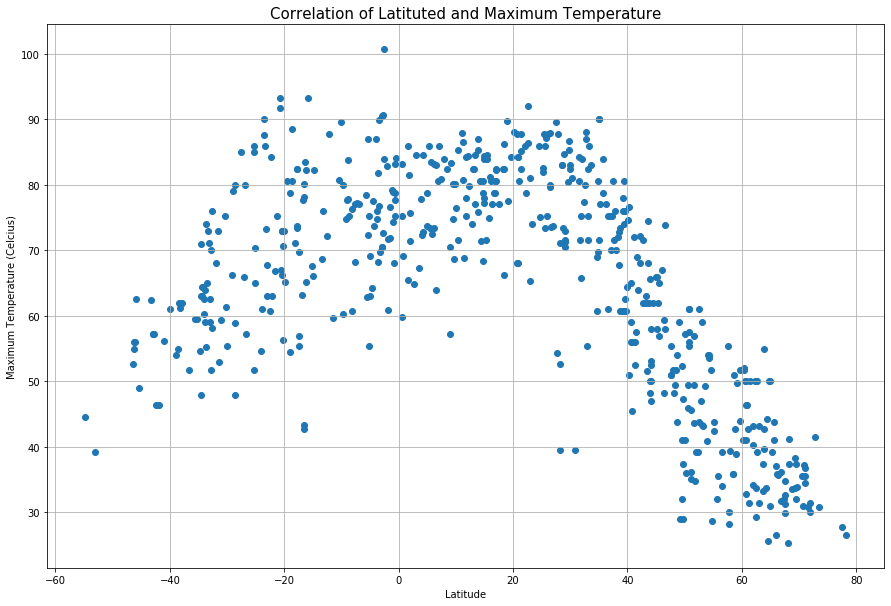

In [14]:
#create a plot based on latitude and max temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Max Temperature"])
#label graph
plt.title("Correlation of Latituted and Maximum Temperature", size=15)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.grid()
#save as png
plt.savefig("../output_data/temp_scatter")

#### Latitude vs. Humidity Plot

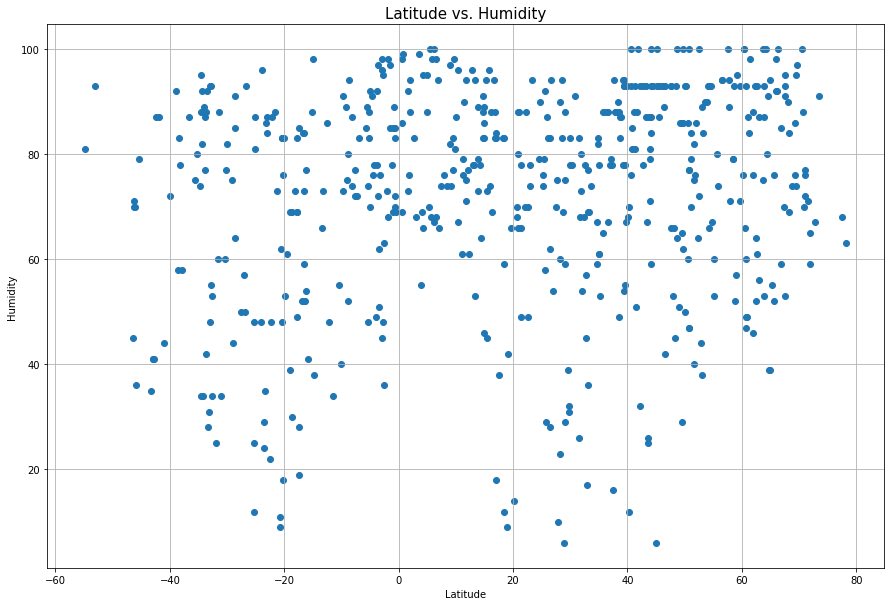

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Humidity"])
#label graph
plt.title("Latitude vs. Humidity", size=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
#save as png
plt.savefig("../output_data/humidity_scatter")

#### Latitude vs. Cloudiness Plot

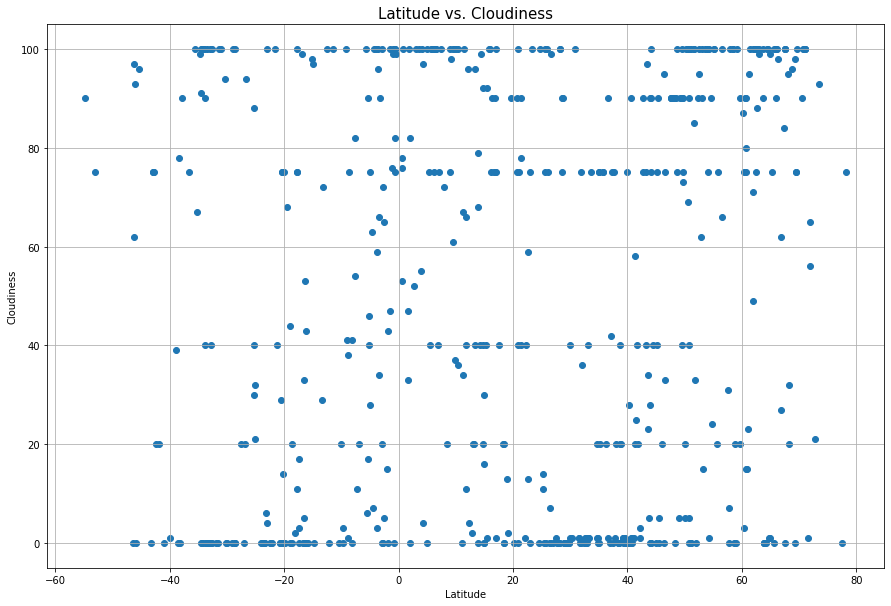

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Cloudiness"])
#label graph
plt.title("Latitude vs. Cloudiness", size=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#save as png
plt.savefig("../output_data/clooudiness_scatter")

#### Latitude vs. Wind Speed Plot

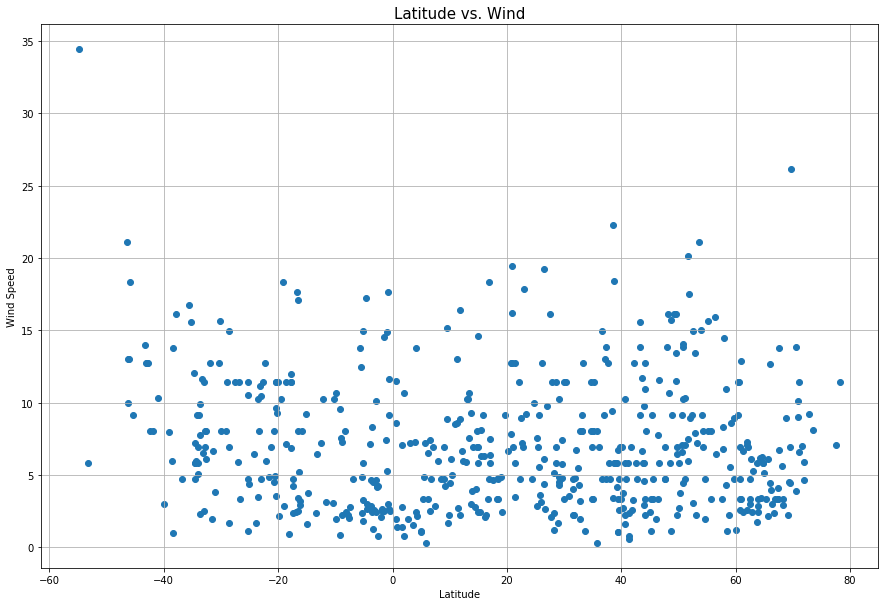

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Wind Speed"])
#label graph
plt.title("Latitude vs. Wind", size=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
#save as png
plt.savefig("../output_data/wind_scatter")